# EDA를 통한 데이터의 형태, 문장길이, 데이터 수, 결측치 등을 파악

In [21]:
!pip install seaborn
!pip install pyarrow

# wiki.json

In [131]:
import json
import pandas as pd
from pandas import json_normalize
from datasets import load_from_disk
import os

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
file_path = os.path.join(parent_dir, 'data', "wikipedia_documents.json")

with open(file_path, "r", encoding="utf-8") as json_file:
    json_data = json.load(json_file)
    
df_wiki=pd.read_json(file_path).transpose()

## 데이터의 형태

In [134]:
json_data["0"]

{'text': '이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.',
 'corpus_source': '위키피디아',
 'url': 'TODO',
 'domain': None,
 'title': '나라 목록',
 'author': None,
 'html': None,
 'document_id': 0}

In [135]:
for key,value in json_data["0"].items():
    print(f"{key} : {value}\n")

text : 이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.

이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.

# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.
# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.

두 목록은 모두 가나다 순이다.

일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.

corpus_source : 위키피디아

url : TODO

domain : None

title : 나라 목록

author : None

html : None

document_id : 0



## 데이터의 수 & 문장 길이

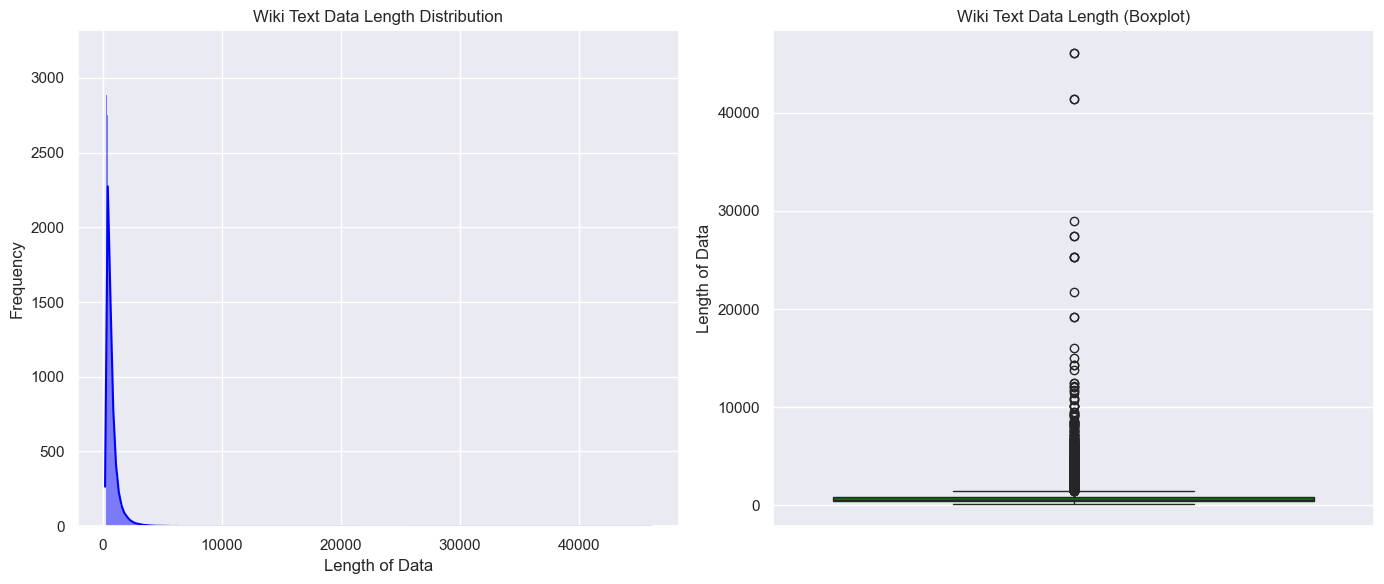

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# 텍스트 길이를 저장하는 열 추가 (이미 있다면 생략 가능)
df_wiki['text_len'] = df_wiki['text'].apply(len)

# 서브플롯 설정: 1행 2열로 그래프 배치
plt.figure(figsize=(14, 6))

# 첫 번째 서브플롯: 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(df_wiki["text_len"], kde=True, color='blue')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Wiki Text Data Length Distribution")

# 두 번째 서브플롯: 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(y=df_wiki["text_len"], color='green')
plt.ylabel("Length of Data")
plt.title("Wiki Text Data Length (Boxplot)")

# 그래프 보여주기
plt.tight_layout()
plt.show()


### 굉장히 outlier가 큰 형태, 그걸 분리해서 보자

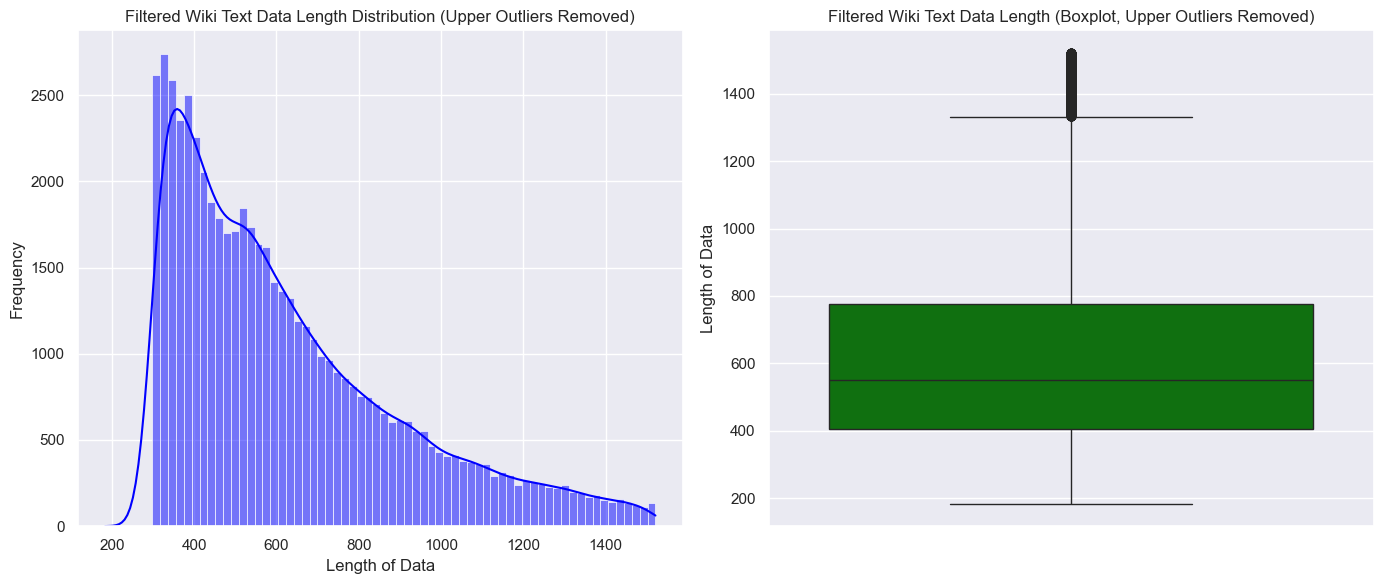

In [152]:
# 상한 IQR 계산
Q1 = df_wiki['text_len'].quantile(0.25)
Q3 = df_wiki['text_len'].quantile(0.75)
IQR = Q3 - Q1  # IQR = Q3 - Q1

# 아웃라이어 제거: Q3 + 1.5 * IQR보다 큰 값만 제거 (상단 아웃라이어 제거)
df_wiki_filtered = df_wiki[df_wiki['text_len'] <= Q3 + 1.5 * IQR]

# 서브플롯 설정: 1행 2열로 그래프 배치
plt.figure(figsize=(14, 6))

# 첫 번째 서브플롯: 아웃라이어 제거 후 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(df_wiki_filtered["text_len"], kde=True, color='blue')
plt.xlabel("Length of Data")
plt.ylabel("Frequency")
plt.title("Filtered Wiki Text Data Length Distribution (Upper Outliers Removed)")

# 두 번째 서브플롯: 아웃라이어 제거 후 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(y=df_wiki_filtered["text_len"], color='green')
plt.ylabel("Length of Data")
plt.title("Filtered Wiki Text Data Length (Boxplot, Upper Outliers Removed)")

# 그래프 보여주기
plt.tight_layout()
plt.show()


In [160]:
# 아웃라이어만 추출 (Q3 + 1.5 * IQR 이상의 값)
outliers = df_wiki[(df_wiki['text_len'] > Q3 + 1.5 * IQR)]

# 아웃라이어를 'text_len' 기준으로 내림차순 정렬
outliers_sorted = outliers.sort_values(by='text_len', ascending=False)

# 아웃라이어의 일부 확인 (정렬된 상태)
display(outliers_sorted.head())


,text,corpus_source,url,domain,title,author,html,document_id,text_length,text_len
9102,"어딘 실이니 례예 여재라\n\n○ 呂滎公名希哲, 字原明. 申國正獻公之長子. 正...",위키피디아,None,None,소학언해,None,None,9102,46099,46099
4548,"어딘 실이니 례예 여재라\n\n○ 呂滎公名希哲, 字原明. 申國正獻公之長子. 正...",위키피디아,TODO,None,소학언해,None,None,4548,46099,46099
4547,"아다온 말이니 례예 다재라\n\n○ 橫渠張先生曰, 敎小兒, 先要安詳恭敬. 今...",위키피디아,TODO,None,소학언해,None,None,4547,41411,41411
9101,"아다온 말이니 례예 다재라\n\n○ 橫渠張先生曰, 敎小兒, 先要安詳恭敬. 今...",위키피디아,None,None,소학언해,None,None,9101,41411,41411
9756,1907년 이후 하와이에 건너가 살던 조선인 노동자들은 하와이 농장에서 사탕수수와 ...,위키피디아,None,None,사진 신부,None,None,9756,29016,29016


URL이 None과 Todo타입으로 나뉘며 보통 2개씩 존재하는듯

## 중복 & 결측치 확인

In [161]:
df_wiki.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60613 entries, 0 to 60612
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           60613 non-null  object
 1   corpus_source  60613 non-null  object
 2   url            4554 non-null   object
 3   domain         0 non-null      object
 4   title          60613 non-null  object
 5   author         0 non-null      object
 6   html           0 non-null      object
 7   document_id    60613 non-null  object
 8   text_length    60613 non-null  int64 
 9   text_len       60613 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 7.1+ MB


In [163]:
df_wiki.nunique()

text             56737
corpus_source        1
url                  1
domain               0
title            31755
author               0
html                 0
document_id      60613
text_length       2912
text_len          2912
dtype: int64

In [158]:
sum(df_wiki["text"].duplicated())

3876

In [161]:
df_wiki[df_wiki[['text']].duplicated(keep=False)].sort_values('text')

,text,corpus_source,url,domain,title,author,html,document_id,text_length
3859,"""Robots.txt""는 이 문서를 가리킵니다. 위키백과의 Robots.txt의 파...",위키피디아,TODO,None,로봇 배제 표준,None,None,3859,429
8413,"""Robots.txt""는 이 문서를 가리킵니다. 위키백과의 Robots.txt의 파...",위키피디아,None,None,로봇 배제 표준,None,None,8413,429
6873,"""들어오지 못하게, 나가지 못하게, 나가도 쓰지 못하게”라는 삼성SDS 고유의 보안...",위키피디아,None,None,삼성SDS,None,None,6873,728
2319,"""들어오지 못하게, 나가지 못하게, 나가도 쓰지 못하게”라는 삼성SDS 고유의 보안...",위키피디아,TODO,None,삼성SDS,None,None,2319,728
3744,"""아미타불""이라는 낱말은 무량광(無量光: 헤아릴 수 없는 광명을 가진 것)의 뜻인 ...",위키피디아,TODO,None,아미타불,None,None,3744,414
...,...,...,...,...,...,...,...,...,...
6497,"힌디어(हिन्दी, Hindi)는 인도유럽어족의 인도이란어파에 속하는 언어로, 영...",위키피디아,None,None,힌디어,None,None,6497,314
7107,"힘이 물체의 운동 방향으로 작용하면, 물체의 운동량이 증가하고 힘이 일을 하므로 에...",위키피디아,None,None,질량-에너지 등가,None,None,7107,609
2553,"힘이 물체의 운동 방향으로 작용하면, 물체의 운동량이 증가하고 힘이 일을 하므로 에...",위키피디아,TODO,None,질량-에너지 등가,None,None,2553,609
9096,"치 셰미니 례예 낫재라.\n\n○ 子思子曰, 天命之謂性, 率性之謂道, 修道...",위키피디아,None,None,소학언해,None,None,9096,5516


In [288]:
df_wiki[df_wiki[['text','url']].duplicated(keep='first')].sort_values('text')

,text,corpus_source,url,domain,title,author,html,document_id,text_length
49841,"10대 닥터\n \n*TARDISODE 8\n*""The beast and his a...",위키피디아,None,None,The Satan Pit,None,None,49841,319
60263,19세기 말부터 러시아의 진보적 귀족과 러시아 농촌 내 농민에게서 자생적으로 발생한...,위키피디아,None,None,노농동맹,None,None,60263,765
56384,2000년부터 김정일은 독립채산제로 인한 자체 수익 사업을 권장하며 방위산업이든 일...,위키피디아,None,None,89호집적회로공장,None,None,56384,599
56109,2000년부터 김정일은 독립채산제로 인한 자체 수익 사업을 권장하며 방위산업이든 일...,위키피디아,None,None,평양집적회로시험공장,None,None,56109,599
49062,2018년 동계 올림픽 크로스컨트리 예선\n올림픽 대회에 앞서 선수 선발전이 진행됐...,위키피디아,None,None,2018년 동계 올림픽 크로스컨트리 여자 10km 프리,None,None,49062,524
...,...,...,...,...,...,...,...,...,...
54994,"팀들은 승점 순으로 정렬된다.(승리시 3점, 무승부시 1점, 패배시 0점), 승점 ...",위키피디아,None,None,2019-20년 UEFA 유로파리그 조별 리그,None,None,54994,354
42937,파일:Pierre Trudeau (1975).jpg|캐나다 캐나다<br />피에르 ...,위키피디아,None,None,제4회 G7 정상회담,None,None,42937,480
5870,한단이 함락되고 공자 가가 대군으로 쫓겨들어온 후에 얼마 지나지 않아 진나라군은 역...,위키피디아,None,None,진나라,None,None,5870,1602
1316,한단이 함락되고 공자 가가 대군으로 쫓겨들어온 후에 얼마 지나지 않아 진나라군은 역...,위키피디아,TODO,None,진나라,None,None,1316,1602


- 7677/2= 3838.5는 3876과다름 -> 3개이상인 친구가 있음 -> 중복은 url이 다르거나(None vs TODO), title이 다름 + document_id도
- 문장의 길이가 같기에 더 파고들지 않음

## train과 validation의 context는 wikipedia의 subset인가?

In [168]:
# Arrow 파일 경로 설정
train_file_path = os.path.join(parent_dir, 'data', 'train_dataset')
dataset = load_from_disk(train_file_path)

train_dataset = dataset["train"]
valid_dataset = dataset["validation"]

train_df=pd.DataFrame(train_dataset)
valid_df=pd.DataFrame(valid_dataset)

display(train_df.info())
display(valid_df.info())
display(df_wiki.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              3952 non-null   object
 1   context            3952 non-null   object
 2   question           3952 non-null   object
 3   id                 3952 non-null   object
 4   answers            3952 non-null   object
 5   document_id        3952 non-null   int64 
 6   __index_level_0__  3952 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 216.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              240 non-null    object
 1   context            240 non-null    object
 2   question           240 non-null    object
 3   id                 240 non-null    object
 4   answers            240 non-null    object
 5   document_id        240 non-null    int64 
 6   __index_level_0__  240 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 13.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 60613 entries, 0 to 60612
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           60613 non-null  object
 1   corpus_source  60613 non-null  object
 2   url            4554 non-null   object
 3   domain         0 non-null      object
 4   title          60613 non-null  object
 5   author         0 non-null      object
 6   html           0 non-null      object
 7   document_id    60613 non-null  object
 8   text_length    60613 non-null  int64 
 9   text_len       60613 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 7.1+ MB


None

### LEFT JOIN을 이용한 Subset인지 확인

In [177]:
import pandas as pd

# train_df와 df_wiki의 title, context(text), document_id 쌍을 비교
train_merged = pd.merge(train_df[['title', 'context', 'document_id']], 
                        df_wiki[['title', 'text', 'document_id']], 
                        how='left', 
                        left_on=['title', 'context', 'document_id'], 
                        right_on=['title', 'text', 'document_id'])

# train_df에서 일치하는 데이터가 있는지 확인
train_matches = train_merged[train_merged['text'].notnull()]
print(f"Train Data: {len(train_matches)} matches found")

# 매칭되지 않은 데이터
train_unmatched = train_merged[train_merged['text'].isnull()]
print(f"Train Data: {len(train_unmatched)} unmatched rows")

# valid_df와 df_wiki의 title, context(text), document_id 쌍을 비교
valid_merged = pd.merge(valid_df[['title', 'context', 'document_id']], 
                        df_wiki[['title', 'text', 'document_id']], 
                        how='left', 
                        left_on=['title', 'context', 'document_id'], 
                        right_on=['title', 'text', 'document_id'])

# valid_df에서 일치하는 데이터가 있는지 확인
valid_matches = valid_merged[valid_merged['text'].notnull()]
print(f"Valid Data: {len(valid_matches)} matches found")

# 매칭되지 않은 데이터
valid_unmatched = valid_merged[valid_merged['text'].isnull()]
print(f"Valid Data: {len(valid_unmatched)} unmatched rows")


Train Data: 3922 matches found
Train Data: 30 unmatched rows
Valid Data: 238 matches found
Valid Data: 2 unmatched rows


In [178]:
display(train_unmatched)
display(valid_unmatched)

,title,context,document_id,text
291,고레인저,"수수께끼의 UFO들과 유럽에서 가면 라이더 V3과 싸우던 철면 군단, 사하라 사막에...",45631,NaN
389,힐,"힐은 전쟁중에 논쟁을 피하지 못했다. 병약한 체질이라서 여러 번 병치레를 했기에, ...",9473,NaN
477,와그너,1929년 후순 대공황의 습격과 함께 와그너는 평범한 시민과 근로자에게 경제적 구호...,59363,NaN
536,케네디,케네디는 1962년 11월 7일 테드 케네디는 연방 상원으로 선서되었다. 그는 그가...,15376,NaN
578,레닌주의,19세기 말부터 러시아의 진보적 귀족과 러시아 농촌 내 농민에게서 자생적으로 발생한...,60263,NaN
654,레닌주의,19세기 말부터 러시아의 진보적 귀족과 러시아 농촌 내 농민에게서 자생적으로 발생한...,60263,NaN
715,조선련봉총회사,조선민주주의인민공화국은 1997년 개정 헌법에 근거한 1999년의 1차 개정을 거쳐...,58794,NaN
806,하워드 마셜,그는 구두로는 안나 니콜 스미스에게 자신의 재산의 반을 주겠다고 약속했다 하나 유언...,36640,NaN
902,톰킨스,톰킨스는 자신이 뉴욕주 헌법 회의로 대표로 만들어졌을 때 자신의 정치 경력을 시작하...,29366,NaN
962,헨드릭스,항상 야망적이었던 헨드릭스는 정치에 뛰어들었다. 그는 1848년 인디애나주 연방 하...,20114,NaN


,title,context,document_id,text
87,와그너,"제2차 세계 대전 후에 와그너는 노동, 사회 보장, 완전 고용 (취업 기회들이 풍부...",59365,NaN
105,댈러스,1839년 귀국 후 댈러스는 제임스 뷰캐넌이 거부한 후 법무장관 직이 제공되었으나 ...,27402,NaN


title-text-id까지 맞는지 비교해보면, 위와같이 안맞는 set이 있다.

### title을 빼고 확인해보자

In [179]:
import pandas as pd

# train_df와 df_wiki의 title, context(text), document_id 쌍을 비교
train_merged = pd.merge(train_df[['context', 'document_id']], 
                        df_wiki[['text', 'document_id']], 
                        how='left', 
                        left_on=['context', 'document_id'], 
                        right_on=['text', 'document_id'])

# train_df에서 일치하는 데이터가 있는지 확인
train_matches = train_merged[train_merged['text'].notnull()]
print(f"Train Data: {len(train_matches)} matches found")

# 매칭되지 않은 데이터
train_unmatched = train_merged[train_merged['text'].isnull()]
print(f"Train Data: {len(train_unmatched)} unmatched rows")

# valid_df와 df_wiki의 title, context(text), document_id 쌍을 비교
valid_merged = pd.merge(valid_df[['context', 'document_id']], 
                        df_wiki[['text', 'document_id']], 
                        how='left', 
                        left_on=['context', 'document_id'], 
                        right_on=['text', 'document_id'])

# valid_df에서 일치하는 데이터가 있는지 확인
valid_matches = valid_merged[valid_merged['text'].notnull()]
print(f"Valid Data: {len(valid_matches)} matches found")

# 매칭되지 않은 데이터
valid_unmatched = valid_merged[valid_merged['text'].isnull()]
print(f"Valid Data: {len(valid_unmatched)} unmatched rows")


Train Data: 3952 matches found
Train Data: 0 unmatched rows
Valid Data: 240 matches found
Valid Data: 0 unmatched rows


### title이 다른 경우가 간헐적으로 존재함. 결론적으로 text자체는 wiki set의 subset이 맞음.

#### wiki에 Text와 text len만 남기면 중복이 다 사라지겠지->얼마나 남을까


In [183]:
# 'text_len'과 'text' 열만으로 새로운 데이터프레임 생성
df_wiki_filtered = df_wiki[['text', 'text_len']].drop_duplicates()

# 생성된 데이터프레임 확인
display(df_wiki_filtered.info())


<class 'pandas.core.frame.DataFrame'>
Index: 56737 entries, 0 to 60612
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      56737 non-null  object
 1   text_len  56737 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


None

#### 중복만 제거했으니 당연히 train/validation set이 새롭게 중복제거한 df_wiki_filtered에 소속되어있겠지만 혹시나 확인

In [187]:
# train_df와 df_wiki의 title, context(text), document_id 쌍을 비교
train_merged = pd.merge(train_df[['context']], 
                        df_wiki_filtered[['text']], 
                        how='left', 
                        left_on=['context'], 
                        right_on=['text'])

# train_df에서 일치하는 데이터가 있는지 확인
train_matches = train_merged[train_merged['text'].notnull()]
print(f"Train Data: {len(train_matches)} matches found")

# 매칭되지 않은 데이터
train_unmatched = train_merged[train_merged['text'].isnull()]
print(f"Train Data: {len(train_unmatched)} unmatched rows")

# valid_df와 df_wiki의 title, context(text), document_id 쌍을 비교
valid_merged = pd.merge(valid_df[['context']], 
                        df_wiki_filtered[['text']], 
                        how='left', 
                        left_on=['context'], 
                        right_on=['text'])

# valid_df에서 일치하는 데이터가 있는지 확인
valid_matches = valid_merged[valid_merged['text'].notnull()]
print(f"Valid Data: {len(valid_matches)} matches found")

# 매칭되지 않은 데이터
valid_unmatched = valid_merged[valid_merged['text'].isnull()]
print(f"Valid Data: {len(valid_unmatched)} unmatched rows")


Train Data: 3952 matches found
Train Data: 0 unmatched rows
Valid Data: 240 matches found
Valid Data: 0 unmatched rows


---

In [1]:
# 인덱스를 열로 추가
df_wiki_filtered_with_index = df_wiki_filtered

# JSON 문자열 생성 (인덱스를 포함하여 저장)
json_str = df_wiki_filtered_with_index.to_json(orient='index', force_ascii=False)

# 파일을 UTF-8로 저장
with open('df_wiki_filtered_with_index.json', 'w', encoding='utf-8') as f:
    f.write(json_str)


NameError: name 'df_wiki_filtered' is not defined

# ETC
## 1 : __index_level_0__ <-????????????????

In [228]:
train_df['__index_level_0__']

0         42
1       2873
2        230
3        992
4        548
        ... 
3947    3445
3948     450
3949    2252
3950    2595
3951    2354
Name: __index_level_0__, Length: 3952, dtype: int64

In [229]:
train_df['__index_level_0__'].describe()

count    3952.000000
mean     1496.027328
std      1060.480948
min         0.000000
25%       587.000000
50%      1189.500000
75%      2416.250000
max      3593.000000
Name: __index_level_0__, dtype: float64

In [231]:
train_df['__index_level_0__'].nunique()

3120

큰 의미없음